In [233]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [234]:
df=pd.read_csv("C:\\Users\\VARUN\\Desktop\\summer internship 2023\\tested.csv")

In [235]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [236]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [237]:
df.shape

(418, 12)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [239]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [240]:
df=df.drop('Cabin',axis=1)
df=df.drop('PassengerId',axis=1)
df=df.drop('Name',axis=1)
df=df.drop('Ticket',axis=1)
df=df.drop('Fare',axis=1)


In [241]:
df['Age'].fillna((df['Age'].mean()),inplace=True)


In [242]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [243]:
X=df
X=X.drop('Survived',axis=1)
Y=df['Survived']

In [244]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.50000,0,0,Q
1,3,female,47.00000,1,0,S
2,2,male,62.00000,0,0,Q
3,3,male,27.00000,0,0,S
4,3,female,22.00000,1,1,S
...,...,...,...,...,...,...
413,3,male,30.27259,0,0,S
414,1,female,39.00000,0,0,C
415,3,male,38.50000,0,0,S
416,3,male,30.27259,0,0,S


In [245]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [246]:
le=LabelEncoder()
le.fit(X['Embarked'])
X['Embarked']=le.transform(X['Embarked'])
le.fit(X['Sex'])
X['Sex']=le.transform(X['Sex'])

In [247]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.50000,0,0,1
1,3,0,47.00000,1,0,2
2,2,1,62.00000,0,0,1
3,3,1,27.00000,0,0,2
4,3,0,22.00000,1,1,2
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,2
414,1,0,39.00000,0,0,0
415,3,1,38.50000,0,0,2
416,3,1,30.27259,0,0,2


In [248]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [249]:
bestfeatures=SelectKBest(score_func=chi2,k='all')
fit=bestfeatures.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featuresScores=pd.concat([dfcolumns,dfscores],axis=1 )
featuresScores.columns=['specs','score']
featuresScores

,specs,score
0,Pclass,1.538844e+00
1,Sex,1.520000e+02
2,Age,2.867315e-07
3,SibSp,7.487395e+00
4,Parch,2.592008e+01
5,Embarked,1.263774e+00


<Axes: >

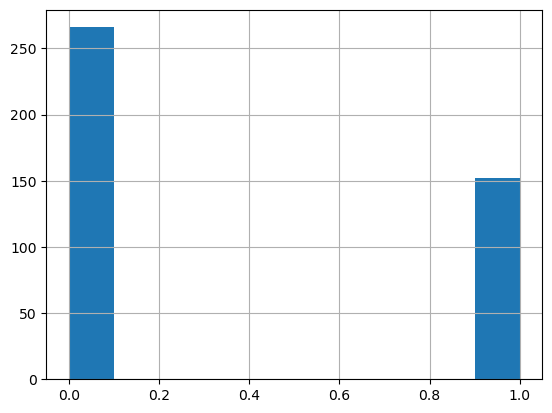

In [250]:
Y.hist()

In [251]:
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

Counter({0: 266, 1: 152})
Counter({0: 266, 1: 266})


<Axes: >

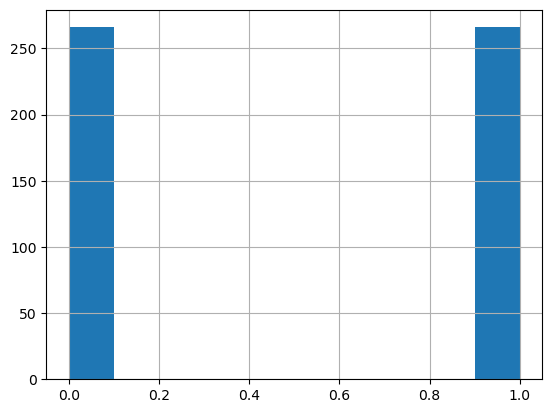

In [252]:
Y.hist()

In [253]:
rfc=RandomForestRegressor()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.1)
rfc.fit(X_train,Y_train)

RandomForestRegressor()

In [254]:
Y_pred=rfc.predict(X_test)

In [255]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

1.0


In [256]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

1.0


In [257]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [258]:

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [259]:
print(r2_score(Y_test,Y_pred))

1.0


In [260]:
print(accuracy_score(Y_test,Y_pred))

1.0
